## Multiple Linear Regression using Normal Equation

**Regression Analysis** is a process of estimating **relationship** between a dependent variable and one or more independent variables or regressors.

**Multiple Linear Regression** estimates linear relationship between **one** dependent variable and **more than one** independent variables.

**Multivariate Linear regression** estimates linear relationship between **many** dependent variables and **one or more** independent variables.

**Note:** Multiple Linear Regression $\neq$ Multivariate Linear Regression

----

### Linear Model
$$ y=\theta_0x_0+\theta_1x_1+...+\theta_mx_m+\epsilon= \epsilon+\sum_{i=0}^m x_i\theta_i$$  
Where,

|Symbol |Description |
| :---:| :--- |
|$y$ |Dependent Variable  |
|$x_i$  |Predictors / Regressors / Independent Variables <br>($x_0=1$) |
|$\theta_i$ | Parameters / Coefficients of the linear model|
|$\epsilon$ | Prediction Error |


In [1]:
clc
close all
clear all
format long

### Hypothesis Function / Linear Model
$$ f([x],\{\theta\})=f_i=\sum_{j} x_{ij} \theta_j \Leftrightarrow \{f\}=[X] \{\theta\}$$  
Where,  

|Symbol |Description |
| :---:| :--- |
|$$f([x],\{\theta\})$$ |Vectorized Function estimating Dependent Variable using linear model |
|$x_i$  |Predictors / Regressors / Independent Variables <br>($x_0=1$) |
|$\theta_i$ | Parameters / Coefficients of the linear model|
|$[X]$    |Design Matrix <br>(Ones filled in 1st column)<br>(Each row for a design point) |  
|$\{\theta\}$| Parameter Column Matrix |

In [2]:
function f=hypothesisFunction(X,theta)
  f=X*theta;
endfunction

### Normal Equation
Finds closed form solution of the linear regression analysis by minimizing the Mean Square Error.
$$ \theta = (X^TX)^{-1}X^Ty $$

In [3]:
function [f,theta]=LinearRegression_NormalEquation(X,y)
    XX=[ones(size(X,1),1) X];
    theta=pinv(XX'*XX)*XX'*y;
    f=@(Z) hypothesisFunction([ones(size(Z,1),1) Z],theta);
endfunction

### Main Program
Reads a csv file having last column as the target and performs linear regression analysis.

In [4]:
[fname,fpath]=uigetfile("*.csv");
fileLoc=fullfile(fpath,fname);
Xy=csvread(fileLoc,1,0);
disp("First 10 entries in the file:")
disp(Xy(1:10,:));
X=Xy(:,1:end-1);
y=Xy(:,end);

First 10 entries in the file:
     71      5    156    137   1470
     28      0    119    114   1104
     51     41    113     51    934
     82     39    173     78   1366
     54     45    187    108   1532
     92     33     41     46    682
     13     31     81     94    917
     97     36    196     34   1261
     94      0     30      6    343
      9      2    134     85    987


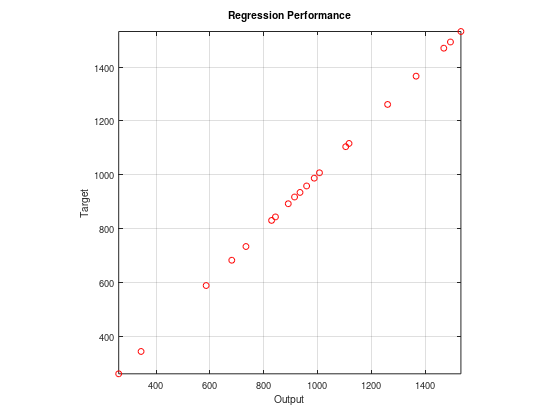

In [5]:
[linRegF,theta]=LinearRegression_NormalEquation(X,y);
plot(linRegF(X),y,'or');
xlabel("Output");
ylabel("Target");
title("Regression Performance");
grid on;
axis equal tight;

In [6]:
printf("Mean Square Error (MSE) = %g\n",sum((linRegF(X)-y).^2)/length(y))
disp("----------------------------")
disp("10th design point regressors:")
disp(X(10,:))
printf("Predicted value of Dependent Variable = %g\n",linRegF(X(10,:)))
printf("Target value of Dependent Variable = %g\n",y(10))

Mean Square Error (MSE) = 1.10409
----------------------------
10th design point regressors:
     9     2   134    85
Predicted value of Dependent Variable = 987.545
Target value of Dependent Variable = 987
